In [2]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MO_DQN
from src.utils import ChebyshevScalarisation
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import torch

### Linear Scalarisation

In [3]:
env = mo_gym.make('mo-circle-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
            "see_behind": True
        }
    }
})

obs, info = env.reset()

linear_agent = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.2,
                      objective_names=["speed_reward", "energy_reward"])
linear_agent.train(10_000, epsilon_start=0.1, epsilon_end=0.0, inv_optimisation_frequency=1)

df = linear_agent.evaluate(num_repetitions= 20, hv_reference_point=np.ndarray([0,0]), seed=11, episode_recording_interval=100)
print(df)
df.to_csv("data/linear_scalarisation_eval.csv")

Training iterations: 100%|██████████| 10000/10000 [02:19<00:00, 71.72it/s]
/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/experimental/wrappers/rendering.py:166: UserWarning: WARN: Overwriting existing videos at /home/franz/Documents/Master_Project/moma-rl-ad/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Weight tuple:   0%|          | 0/66 [00:00<?, ?it/s]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-0.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-0.mp4



Weight tuple:   0%|          | 0/66 [00:00<?, ?it/s]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-0.mp4


Weight tuple:   2%|▏         | 1/66 [00:20<19:35, 18.08s/it]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-20.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-20.mp4



Weight tuple:   2%|▏         | 1/66 [00:20<19:35, 18.08s/it]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-20.mp4


Weight tuple:   3%|▎         | 2/66 [00:38<20:39, 19.37s/it]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-40.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-40.mp4



Weight tuple:   3%|▎         | 2/66 [00:38<20:39, 19.37s/it]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-40.mp4


Weight tuple:   5%|▍         | 3/66 [01:00<18:34, 17.69s/it]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-60.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-60.mp4



Weight tuple:   5%|▍         | 3/66 [01:01<18:34, 17.69s/it]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-60.mp4


Weight tuple:   6%|▌         | 4/66 [01:20<21:37, 20.93s/it]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-80.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-80.mp4



Weight tuple:   6%|▌         | 4/66 [01:20<21:37, 20.93s/it]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-80.mp4


Weight tuple:   8%|▊         | 5/66 [01:38<20:26, 20.11s/it]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-100.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-100.mp4



Weight tuple:   8%|▊         | 5/66 [01:38<20:26, 20.11s/it]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-100.mp4


Weight tuple:   8%|▊         | 5/66 [01:49<22:20, 21.97s/it]


KeyboardInterrupt: 

### Chebyshev Scalarisation

In [3]:
env = mo_gym.make('mo-circle-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
        }
    }
})

obs, info = env.reset()
scal_arguments = [torch.tensor([-float("inf"),-float("inf")]), 0.1] #initial utopian and threshold value
cheb_agent = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.2,
                      objective_names=["speed_reward", "energy_reward"], scalarisation_method=ChebyshevScalarisation, scalarisation_argument_list=scal_arguments)
cheb_agent.train(150_000, epsilon_start=0.1, epsilon_end=0.1, inv_optimisation_frequency=1)

df = cheb_agent.evaluate(num_repetitions= 20, hv_reference_point=np.ndarray([0,0]), seed=11)
print(df)
df.to_csv("data/chebyshev_scalarisation_eval.csv")

Training iterations:   0%|          | 0/150000 [00:00<?, ?it/s]

Weight tuple: 100%|██████████| 66/66 [12:39<00:00, 11.50s/it]

      repetition_number  weight_index weight_tuple  num_iterations  \
0                     0             0   [0.0, 1.0]               5   
1                     1             0   [0.0, 1.0]              42   
2                     2             0   [0.0, 1.0]               9   
3                     3             0   [0.0, 1.0]               3   
4                     4             0   [0.0, 1.0]              20   
...                 ...           ...          ...             ...   
1315                 15            65   [1.0, 0.0]               5   
1316                 16            65   [1.0, 0.0]               1   
1317                 17            65   [1.0, 0.0]               6   
1318                 18            65   [1.0, 0.0]              23   
1319                 19            65   [1.0, 0.0]              71   

      normalised_speed_reward  normalised_energy_reward  raw_speed_reward  \
0                    0.260000                  0.750823              1.30   
1    

In [5]:
df = linear_agent.evaluate(num_repetitions= 20, hv_reference_point=np.ndarray([0,0]), seed=11, episode_recording_interval=20)
print(df)
df.to_csv("data/linear_scalarisation_eval.csv")

/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/experimental/wrappers/rendering.py:166: UserWarning: WARN: Overwriting existing videos at /home/franz/Documents/Master_Project/moma-rl-ad/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Weight tuple:   0%|          | 0/66 [00:00<?, ?it/s]


AttributeError: 'MO_DQN' object has no attribute 'recording_interval'

In [29]:
df = cheb_agent.evaluate(num_repetitions= 20, hv_reference_point=np.ndarray([0,0]), seed=11)
print(df)
df.to_csv("data/chebyshev_scalarisation_eval.csv")

/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(
Weight tuple: 100%|██████████| 66/66 [13:08<00:00, 11.94s/it]

      repetition_number  weight_index weight_tuple  normalised_speed_reward  \
0                     0             0   [0.0, 1.0]                 0.616667   
1                     1             0   [0.0, 1.0]                 0.218167   
2                     2             0   [0.0, 1.0]                 0.616667   
3                     3             0   [0.0, 1.0]                 0.236667   
4                     4             0   [0.0, 1.0]                 0.347667   
...                 ...           ...          ...                      ...   
1315                 15            65   [1.0, 0.0]                 0.616667   
1316                 16            65   [1.0, 0.0]                 0.020833   
1317                 17            65   [1.0, 0.0]                 0.616667   
1318                 18            65   [1.0, 0.0]                 0.616667   
1319                 19            65   [1.0, 0.0]                 0.156500   

      normalised_energy_reward  raw_speed_reward  r

## Visualisation

In [4]:
df_linear = pd.read_csv("data/linear_scalarisation_eval.csv")
df_cheb = pd.read_csv("data/chebyshev_scalarisation_eval.csv")
display(df_linear.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1320 non-null   int64  
 1   repetition_number         1320 non-null   int64  
 2   weight_index              1320 non-null   int64  
 3   weight_tuple              1320 non-null   object 
 4   num_iterations            1320 non-null   int64  
 5   normalised_speed_reward   1320 non-null   float64
 6   normalised_energy_reward  1320 non-null   float64
 7   raw_speed_reward          1320 non-null   float64
 8   raw_energy_reward         1320 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 92.9+ KB


None

In [5]:
grouped_df_linear = df_linear.groupby("weight_index")[["normalised_speed_reward","normalised_energy_reward"]].mean()
grouped_df_cheb = df_cheb.groupby("weight_index")[["normalised_speed_reward","normalised_energy_reward"]].mean()

<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

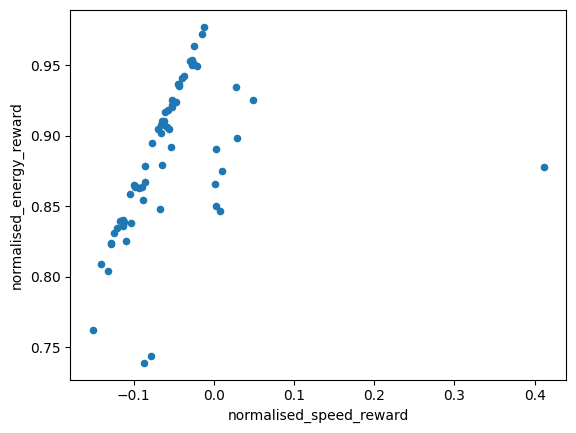

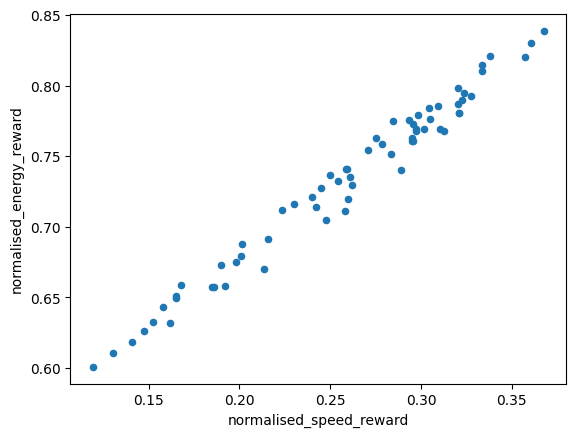

In [6]:
grouped_df_linear.plot.scatter(x="normalised_speed_reward",y="normalised_energy_reward")
grouped_df_cheb.plot.scatter(x="normalised_speed_reward",y="normalised_energy_reward")

<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

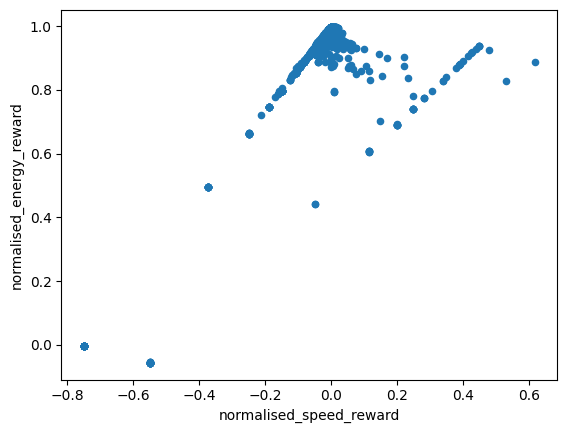

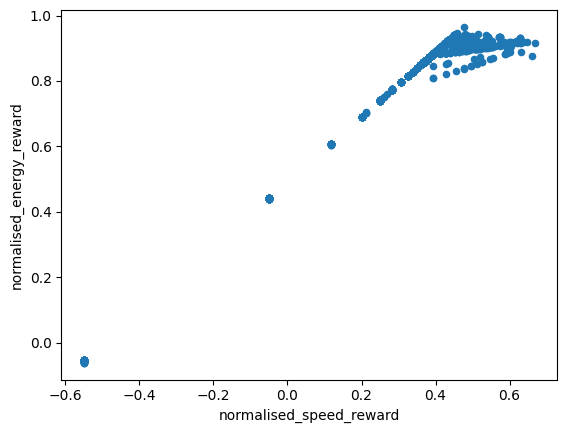

In [7]:
df_linear.plot.scatter("normalised_speed_reward","normalised_energy_reward")
df_cheb.plot.scatter("normalised_speed_reward","normalised_energy_reward")